In [1]:
import random
import csv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from itertools import product
from specs import *

In [2]:
random.seed(42)

## import trials

In [3]:
import json

with open("C:/Users/Sarah Zheng/dev/cards-deception/cards-game/src/assets/trials_40shuffled.json", "r") as read_file:
    trials_source = json.load(read_file)

In [4]:
trials_source[0:5]

[{'n_red': 1, 'outcome': -1},
 {'n_red': 3, 'outcome': -1},
 {'n_red': 2, 'outcome': 1},
 {'n_red': 1, 'outcome': -1},
 {'n_red': 2, 'outcome': -1}]

In [5]:
trials = []
for trial in trials_source:
    trials.append(Trial(n_red=trial['n_red'], outcome=trial['outcome']))

In [6]:
trials200 = trials_source * 5

In [7]:
trials200_noshuffle = []
for trial in trials200:
    trials200_noshuffle.append(Trial(n_red=trial['n_red'], outcome=trial['outcome']))

In [8]:
random.shuffle(trials200)

trials200_shuffled = []

for trial in trials200:
    trials200_shuffled.append(Trial(n_red=trial['n_red'], outcome=trial['outcome']))

## agent parameter initialization

In [9]:
# simulate multiple different players
alpha = np.linspace(0.1, 1, 10)
s0 = [0, 0.1, 0.2, 0.3, 0.4, 0.5] # outside these lower and upper bounds, unsigned suspicion values definitely out of range [0,1]

params = (list(product(alpha, s0)))

In [10]:
len(params) # == len(alpha) * len(s0)

60

In [11]:
players = []
for param in params:
    players.append(Player(alpha=param[0], pre_suspicion=param[1]))

## generate simulated data

In [12]:
# generate simulated suspicion values for agent 1
simulated_suspicion_values = []
simulated_suspicion_ratings = []
simulation_logs = []

ip=58

for i in range(10):
    g = Game(trials, players[ip])
    g.simulate_unsigned(verbose=False, save=False, add_noise=True, set_noise=0.01) # note: more noise will worsen recovery
    simulated_suspicion_values.append(g.unsigned_expectation_violation)
    simulation_logs.append(g.sim_log)
    simulated_suspicion_ratings.append(g.unsigned_suspicion_to_honesty_rating())

starting game play simulation with unsigned suspicion
player attributes: prior: 0.4 alpha: 1.0
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with unsigned suspicion
player attributes: prior: 0.4 alpha: 1.0
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
tri

[Text(0.5, 0, 'trials'), Text(0, 0.5, 'unsigned suspicion value'), (0.0, 1.5)]

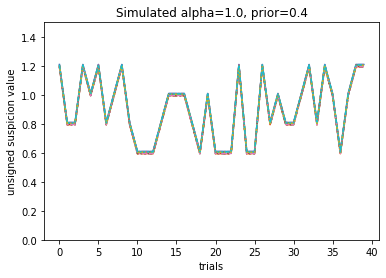

In [13]:
# plot noisy iterations for same agent
ax = sns.lineplot(data=simulated_suspicion_values, legend=False)
ax.set_title("Simulated alpha="+str(params[ip][0])+", prior="+str(params[ip][1]))
ax.set(xlabel='trials', ylabel='unsigned suspicion value', ylim=(0,1.5))

[Text(0.5, 0, 'trials'), Text(0, 0.5, 'unsigned suspicion value'), (0.0, 1.0)]

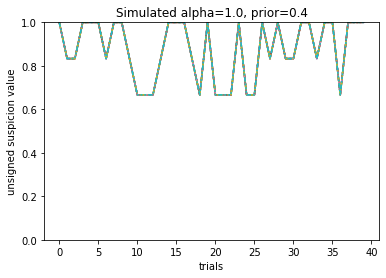

In [14]:
# plot noisy iterations for same agent
ax = sns.lineplot(data=simulated_suspicion_ratings, legend=False)
ax.set_title("Simulated alpha="+str(params[ip][0])+", prior="+str(params[ip][1]))
ax.set(xlabel='trials', ylabel='unsigned suspicion value', ylim=(0,1))

In [15]:
# generate simulated suspicion values for each initialized agent
simulated_suspicion_values = []
simulated_suspicion_ratings = []
simulation_logs = []

for player in players:
    g = Game(trials, player)
    g.simulate_unsigned(verbose=False, save=False, add_noise=True, set_noise=0.01) # note: more noise will worsen recovery
    simulated_suspicion_values.append(g.unsigned_expectation_violation)
    simulation_logs.append(g.sim_log)
    simulated_suspicion_ratings.append(g.unsigned_suspicion_to_honesty_rating())

starting game play simulation with unsigned suspicion
player attributes: prior: 0 alpha: 0.1
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with unsigned suspicion
player attributes: prior: 0.1 alpha: 0.1
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial

trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with unsigned suspicion
player attributes: prior: 0.5 alpha: 0.6
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with unsigned suspicion
player attributes: prior: 0 alpha: 0.7000000000000001
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
t

[Text(0.5, 0, 'trials'), Text(0, 0.5, 'unsigned suspicion value'), (0.0, 1.0)]

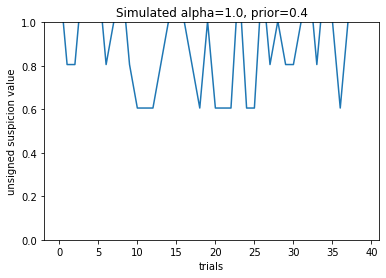

In [16]:
i = 58

ax = sns.lineplot(data=simulated_suspicion_values[i], legend=False)
ax.set_title("Simulated alpha="+str(params[i][0])+", prior="+str(params[i][1]))
ax.set(xlabel='trials', ylabel='unsigned suspicion value', ylim=(0,1))

[Text(0.5, 0, 'trials'), Text(0, 0.5, 'unsigned suspicion value'), (0.0, 1.0)]

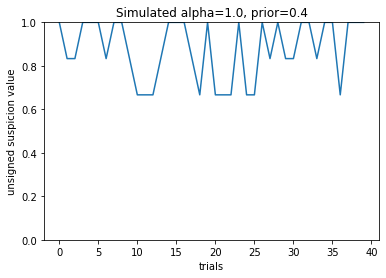

In [17]:
i = 58

ax = sns.lineplot(data=simulated_suspicion_ratings[i], legend=False)
ax.set_title("Simulated alpha="+str(params[i][0])+", prior="+str(params[i][1]))
ax.set(xlabel='trials', ylabel='unsigned suspicion value', ylim=(0,1))

## recover parameters

### using grid search

In [57]:
best_param_sv = []
all_residuals_sv = []
all_R2_sv = []
best_param_sv_SSE = []
best_param_sv_R2 = []

best_param_sv_rating = []
all_residuals_sv_rating = []
all_R2_sv_rating = []
best_param_sv_rating_SSE = []
best_param_sv_rating_R2 = []

for p, data in enumerate(simulated_suspicion_ratings):
    generated_suspicion_ratings = np.array(data)
    generated_unsigned_suspicion = np.array(pd.DataFrame(simulation_logs[p])['suspicion_t'])
    SSres_sv = []
    SStot_sv = []
    SSres_sv_rating = []
    SStot_sv_rating = []
    
    for i, param in enumerate(params):
        g = Game(trials, Player(alpha=param[0], pre_suspicion=param[1]))
        g.simulate_unsigned(verbose=False, save=False, add_noise=False)
        
        sv = np.array(g.unsigned_expectation_violation)
        residuals_sv = np.sum((generated_unsigned_suspicion-sv)**2)
        SSres_sv.append(residuals_sv)
        totals_sv = np.sum(np.array(generated_unsigned_suspicion-generated_unsigned_suspicion.mean())**2)
        SStot_sv.append(totals_sv)
        
        sv_rating = g.unsigned_suspicion_to_honesty_rating()
        residuals_sv_rating = np.sum((generated_suspicion_ratings-sv_rating)**2)
        SSres_sv_rating.append(residuals_sv_rating)
        totals_sv_rating = np.sum(np.array(generated_suspicion_ratings-generated_suspicion_ratings.mean())**2)
        SStot_sv_rating.append(totals_sv_rating)
    
    R2_sv = 1 - np.array(SSres_sv)/np.array(SStot_sv)
    R2_sv_rating = 1 - np.array(SSres_sv_rating)/np.array(SStot_sv_rating)
    
    all_residuals_sv.append(SSres_sv)
    all_R2_sv.append(R2_sv)
    best_idx_sv = np.array(SSres_sv).argmin()
    best_param_sv.append(params[best_idx_sv])
    best_param_sv_SSE.append(np.array(SSres_sv).min())
    best_param_sv_R2.append(R2_sv[best_idx_sv])
    
    all_residuals_sv_rating.append(SSres_sv_rating)
    all_R2_sv_rating.append(R2_sv_rating)
    best_idx_sv_rating = np.array(SSres_sv_rating).argmin()
    best_param_sv_rating.append(params[best_idx_sv_rating])
    best_param_sv_rating_SSE.append(np.array(SSres_sv_rating).min())
    best_param_sv_rating_R2.append(R2_sv_rating[best_idx_sv_rating])

starting game play simulation with unsigned suspicion
player attributes: prior: 0 alpha: 0.1
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with unsigned suspicion
player attributes: prior: 0.1 alpha: 0.1
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial

trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with unsigned suspicion
player attributes: prior: 0.4 alpha: 0.6
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with unsi

trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with unsigned suspicion
player attributes: prior: 0.4 alpha: 0.1
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with unsigned suspicion
player attributes: prior: 0.5 alpha: 0.1
trial:  1
trial:  2
trial: 

trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with unsigned suspicion
player attributes: prior: 0.5 alpha: 0.6
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with unsigned suspicion
player attributes: prior: 0 alpha: 0.7000000000000001
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
t

<ipython-input-57-36704f485e3f>:38: RuntimeWarning: divide by zero encountered in true_divide
  R2_sv_rating = 1 - np.array(SSres_sv_rating)/np.array(SStot_sv_rating)
<ipython-input-57-36704f485e3f>:38: RuntimeWarning: invalid value encountered in true_divide
  R2_sv_rating = 1 - np.array(SSres_sv_rating)/np.array(SStot_sv_rating)


 2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with unsigned suspicion
player attributes: prior: 0 alpha: 0.30000000000000004
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
st

trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with unsigned suspicion
player attributes: prior: 0.4 alpha: 0.8
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with unsigned suspicion
player attributes: prior: 0.5 alpha: 0.8
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
tri

trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with unsigned suspicion
player attributes: prior: 0.5 alpha: 0.30000000000000004
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with unsigned suspicion
player attributes: prior: 0 alpha: 0.4
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23


player attributes: prior: 0.1 alpha: 0.8
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with unsigned suspicion
player attributes: prior: 0.2 alpha: 0.8
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
tr

trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with unsigned suspicion
player attributes: prior: 0 alpha: 0.4
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with unsigned suspicion
player attributes: prior: 0.1 alpha: 0.4
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial

end of simulated game
starting game play simulation with unsigned suspicion
player attributes: prior: 0.4 alpha: 0.9
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with unsigned suspicion
player attributes: prior: 0.5 alpha: 0.9
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
tri

trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with unsigned suspicion
player attributes: prior: 0.4 alpha: 0.4
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with unsigned suspicion
player attributes: prior: 0.5 alpha: 0.4
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
tri

trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with unsigned suspicion
player attributes: prior: 0.1 alpha: 1.0
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with unsigned suspicion
player attributes: prior: 0.2 alpha: 1.0
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
t

trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with unsigned suspicion
player attributes: prior: 0 alpha: 0.6
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with unsigned suspicion
player attributes: prior: 0.1 alpha: 0.6
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial

trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with unsigned suspicion
player attributes: prior: 0.3 alpha: 0.1
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with unsigned suspi

trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with unsigned suspicion
player attributes: prior: 0.3 alpha: 0.7000000000000001
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with unsigned suspicion
player attributes: prior: 0.4 alpha: 0.7000000000000001
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:

starting game play simulation with unsigned suspicion
player attributes: prior: 0.4 alpha: 0.2
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with unsigned suspicion
player attributes: prior: 0.5 alpha: 0.2
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
tri

trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with unsigned suspicion
player attributes: prior: 0.5 alpha: 0.8
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with unsigned suspicion
player attributes: prior: 0 alpha: 0.9
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
t

player attributes: prior: 0.4 alpha: 0.4
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with unsigned suspicion
player attributes: prior: 0.5 alpha: 0.4
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
tr

trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with unsigned suspicion
player attributes: prior: 0.3 alpha: 0.9
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with unsigned suspicion
player attributes: prior: 0.4 alpha: 0.9
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
tri

trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with unsigned suspicion
player attributes: prior: 0.4 alpha: 0.4
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with unsigned suspicion
player attributes: prior: 0.5 alpha: 0.4
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
tri

trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with unsigned suspicion
player attributes: prior: 0 alpha: 0.1
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with unsigned suspicion
player attributes: prior: 0.1 alpha: 0.1
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial

trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with unsigned suspicion
player attributes: prior: 0.5 alpha: 0.6
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with unsigned suspicion
playe

trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with unsigned suspicion
player attributes: prior: 0.3 alpha: 0.2
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with unsigned suspicion
player attributes: prior: 0.4 alpha: 0.2
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
tri

trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with unsigned suspicion
player attributes: prior: 0.5 alpha: 0.7000000000000001
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game 

trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with unsigned suspicion
player attributes: prior: 0 alpha: 0.4
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with unsigned suspicion
player attributes: prior: 0.1 alpha: 0.4
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial

trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with unsigned suspicion
player attributes: prior: 0 alpha: 0.9
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play si

trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with unsigned suspicion
player attributes: prior: 0.1 alpha: 0.5
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with unsigned suspicion
player attributes: prior: 0.2 alpha: 0.5
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6


trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with unsigned suspicion
player attributes: prior: 0.4 alpha: 1.0
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with unsi

trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with unsigned suspicion
player attributes: prior: 0 alpha: 0.6
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with unsigned suspicion
player attributes: prior: 0.1 alpha: 0.6
trial:  1
trial:  2
trial:  3

starting game play simulation with unsigned suspicion
player attributes: prior: 0 alpha: 0.2
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with unsigned suspicion
player attributes: prior: 0.1 alpha: 0.2
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial

trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with unsigned suspicion
player attributes: prior: 0.3 alpha: 0.7000000000000001
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with unsigned suspicion
player attributes: prior: 0.4 alpha: 0.7000000000000001
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:

trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with unsigned suspicion
player attributes: prior: 0.2 alpha: 0.30000000000000004
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with unsigned suspicion

trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with unsigned suspicion
player attributes: prior: 0 alpha: 0.8
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with unsigned suspicion
player attributes: prior: 0.1 alpha: 0.8
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial

trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with unsigned suspicion
player attributes: prior: 0.3 alpha: 0.4
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with unsigned suspicion
player attributes: prior: 0.4 alpha: 0.4
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
tri

trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with unsigned suspicion
player attributes: prior: 0 alpha: 1.0
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with unsigned suspicion
player attributes: prior: 0.1 alpha: 1.0
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial

trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with unsigned suspicion
player attributes: prior: 0.2 alpha: 0.6
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation

trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with unsigned suspicion
player attributes: prior: 0 alpha: 0.2
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with unsigned suspicion
player attributes: prior: 0.1 alpha: 0.2
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial

trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with unsigned suspicion
player attributes: prior: 0.4 alpha: 0.7000000000000001
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with unsigned suspicion
player attributes: prior: 0.5 alpha: 0.7000000000000001
trial:  1
trial:  2
trial:  3


starting game play simulation with unsigned suspicion
player attributes: prior: 0.2 alpha: 0.30000000000000004
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with unsigned suspicion
player attributes: prior: 0.3 alpha: 0.30000000000000004
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
tria

player attributes: prior: 0.1 alpha: 0.9
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with unsigned suspicion
player attributes: prior: 0.2 alpha: 0.9
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
tr

trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with unsigned suspicion
player attributes: prior: 0.4 alpha: 0.4
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with unsigned suspicion
player attributes: prior: 0.5 alpha: 0.4
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
tri

trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with unsigned suspicion
player attributes: prior: 0 alpha: 1.0
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with unsigned suspicion
player attributes: prior: 0.1 alpha: 1.0
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial

trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with unsigned suspicion
player attributes: prior: 0.3 alpha: 0.5
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with unsigned suspicion
player attributes: prior: 0.4 alpha: 0.5
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
tri

trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with unsigned suspicion
player attributes: prior: 0.2 alpha: 0.1
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with unsigned suspicion
playe

trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with unsigned suspicion
player attributes: prior: 0 alpha: 0.7000000000000001
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with unsigned suspicion
player attributes: prior: 0.1 alpha: 0.7000000000000001
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  

trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with unsigned suspicion
player attributes: prior: 0.2 alpha: 0.2
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with unsigned suspicion
player attributes: prior: 0.3 alpha: 0.2
trial:  1
trial:  2
trial: 

trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with unsigned suspicion
player attributes: prior: 0.3 alpha: 0.8
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game

player attributes: prior: 0.5 alpha: 0.30000000000000004
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with unsigned suspicion
player attributes: prior: 0 alpha: 0.4
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37

trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with unsigned suspicion
player attributes: prior: 0 alpha: 1.0
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with unsigned suspicion
player attributes: prior: 0.1 alpha: 1.0
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial

player attributes: prior: 0.2 alpha: 0.5
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with unsigned suspicion
player attributes: prior: 0.3 alpha: 0.5
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
tr

starting game play simulation with unsigned suspicion
player attributes: prior: 0 alpha: 0.1
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with unsigned suspicion
player attributes: prior: 0.1 alpha: 0.1
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial

starting game play simulation with unsigned suspicion
player attributes: prior: 0.4 alpha: 0.6
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with unsigned suspicion
player attributes: prior: 0.5 alpha: 0.6
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
tri

trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with unsigned suspicion
player attributes: prior: 0 alpha: 0.2
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with unsigned suspicion
player attributes: prior: 0.1 alpha: 0.2
trial:  1
trial:  2
trial:  3
trial:  4


trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with unsigned suspicion
player attributes: prior: 0.1 alpha: 0.8
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with unsigned suspicion
player attributes: prior: 0.2 alpha: 0.8
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
tr

trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with unsigned suspicion
player attributes: prior: 0.3 alpha: 0.30000000000000004
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with unsigned suspicion
player attributes: prior: 0.4 alpha: 0.30000000000000004
trial:  1
trial:  2
trial:  3
trial:  4

player attributes: prior: 0.3 alpha: 0.9
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with unsigned suspicion
player attributes: prior: 0.4 alpha: 0.9
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
tr

trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with unsigned suspicion
player attributes: prior: 0 alpha: 0.5
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with unsigned suspicion
player attributes: prior: 0.1 alpha: 0.5
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial

trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with unsigned suspicion
player attributes: prior: 0.4 alpha: 1.0
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with unsigned suspicion
player attributes: prior: 0.5 alpha: 1.0
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
tri

trial:  39
trial:  40
end of simulated game
starting game play simulation with unsigned suspicion
player attributes: prior: 0.4 alpha: 0.5
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with unsigned suspicion
player attributes: prior: 0.5 alpha: 0.5
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
tri

trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with unsigned suspicion
player attributes: prior: 0 alpha: 0.2
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with unsigned suspicion
player 

trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with unsigned suspicion
player attributes: prior: 0 alpha: 0.7000000000000001
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with unsigned suspicion
player attributes: prior: 0.1 alpha: 0.7000000000000001
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  

trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with unsigned suspicion
player attributes: prior: 0.2 alpha: 0.2
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with unsigned suspicion
player attributes: prior: 0.3 alpha: 0.2
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
tri

trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with unsigned suspicion
player attributes: prior: 0.4 alpha: 0.7000000000000001
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with unsigned suspicion
player attributes: prior: 0.5 alpha: 0.7000000000000001
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:

trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with unsigned suspicion
player attributes: prior: 0.1 alpha: 0.4
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play 

trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with unsigned suspicion
player attributes: prior: 0.5 alpha: 0.9
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with unsigned suspicion
player attributes: prior: 0 alpha: 1.0
trial:  1
trial:  2
trial:  3
trial:  4


trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with unsigned suspicion
player attributes: prior: 0 alpha: 0.5
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with unsigned suspicion
player attributes: prior: 0.1 alpha: 0.5
trial:  1
trial:  

trial:  39
trial:  40
end of simulated game
starting game play simulation with unsigned suspicion
player attributes: prior: 0.3 alpha: 1.0
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with unsigned suspicion
player attributes: prior: 0.4 alpha: 1.0
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
tri

trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with unsigned suspicion
player attributes: prior: 0.2 alpha: 0.6
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with unsigned suspicion
player attributes: prior: 0.3 alpha: 0.6
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
tri

end of simulated game
starting game play simulation with unsigned suspicion
player attributes: prior: 0.2 alpha: 0.2
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with unsigned suspicion
player attributes: prior: 0.3 alpha: 0.2
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
tri

starting game play simulation with unsigned suspicion
player attributes: prior: 0.5 alpha: 0.7000000000000001
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with unsigned suspicion
player attributes: prior: 0 alpha: 0.8
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
t

trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with unsigned suspicion
player attributes: prior: 0.3 alpha: 0.30000000000000004
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with unsigned suspicion
player attributes: prior: 0.4 alpha: 0.30000000000000004
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
tria

player attributes: prior: 0.2 alpha: 0.8
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with unsigned suspicion
player attributes: prior: 0.3 alpha: 0.8
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
tr

trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with unsigned suspicion
player attributes: prior: 0.1 alpha: 0.4
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game

trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with unsigned suspicion
player attributes: prior: 0.5 alpha: 0.9
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with unsigned suspicion
player attributes: prior: 0 alpha: 1.0
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial

player attributes: prior: 0.3 alpha: 0.5
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with unsigned suspicion
player attributes: prior: 0.4 alpha: 0.5
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
tr

starting game play simulation with unsigned suspicion
player attributes: prior: 0 alpha: 0.1
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with unsigned suspicion
player attributes: prior: 0.1 alpha: 0.1
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial

trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with unsigned suspicion
player attributes: prior: 0 alpha: 0.7000000000000001
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated g

trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with unsigned suspicion
player attributes: prior: 0.5 alpha: 0.1
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with unsigned suspicion
player attributes: prior: 0 alpha: 0.2
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial

trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with unsigned suspicion
player attributes: prior: 0.3 alpha: 0.7000000000000001
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with unsigned suspicion
player attributes: prior: 0.4 alpha: 0.7000000000000001
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:

trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with unsigned suspicion
player attributes: prior: 0 alpha: 0.30000000000000004
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with unsigned suspicion
player attributes: prior: 0.1 alpha: 0.30000000000000004
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:

trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with unsigned suspicion
player attributes: prior: 0 alpha: 0.8
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with unsigned suspicion
player attributes: prior: 0.1 alpha: 0.8
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial

trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with unsigned suspicion
player attributes: prior: 0 alpha: 0.30000000000000004
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
start

trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with unsigned suspicion
player attributes: prior: 0.4 alpha: 0.8
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with unsigned suspicion
player attributes: prior: 0.5 alpha: 0.8
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
tri

trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with unsigned suspicion
player attributes: prior: 0.3 alpha: 0.30000000000000004
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with unsigned suspicion
player attributes: prior: 0.4 alpha: 0.30

starting game play simulation with unsigned suspicion
player attributes: prior: 0.3 alpha: 0.8
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with unsigned suspicion
player attributes: prior: 0.4 alpha: 0.8
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
tri

trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with unsigned suspicion
player attributes: prior: 0.3 alpha: 0.4
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with unsigned suspicion
playe

trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with unsigned suspicion
player attributes: prior: 0.5 alpha: 0.8
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with unsigned suspicion
player attributes: prior: 0 alpha: 0.9
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial

trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with unsigned suspicion
player attributes: prior: 0.5 alpha: 0.4
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with unsigned suspi

trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with unsigned suspicion
player attributes: prior: 0.2 alpha: 1.0
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with unsigned suspicion
playe

trial:  39
trial:  40
end of simulated game
starting game play simulation with unsigned suspicion
player attributes: prior: 0 alpha: 0.5
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with unsigned suspicion
player attributes: prior: 0.1 alpha: 0.5
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial

trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with unsigned suspicion
player attributes: prior: 0 alpha: 0.1
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with unsigned suspicion
player attributes: prior: 0.1 alpha: 0.1
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
t

trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with unsigned suspicion
player attributes: prior: 0.3 alpha: 0.6
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with unsigned suspicion
player attributes: prior: 0.4 alpha: 0.6
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
tri

trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with unsigned suspicion
player attributes: prior: 0.2 alpha: 0.2
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with unsigned suspicion
player attributes: prior: 0.3 alpha: 0.2
trial:  1
trial:  2
trial:  3
trial:  

player attributes: prior: 0.5 alpha: 0.7000000000000001
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with unsigned suspicion
player attributes: prior: 0 alpha: 0.8
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37


trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with unsigned suspicion
player attributes: prior: 0.5 alpha: 0.30000000000000004
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with unsigned suspicion
player attributes: prior: 0 alpha: 0.4
tr

trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with unsigned suspicion
player attributes: prior: 0.3 alpha: 0.9
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with unsigned suspicion
player attributes: prior: 0.4 alpha: 0.9
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
tri

trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with unsigned suspicion
player attributes: prior: 0.2 alpha: 0.5
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with unsigned suspicion
player attributes: prior: 0.3 alpha

trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with unsigned suspicion
player attributes: prior: 0.2 alpha: 1.0
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with unsigned suspicion
playe

trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with unsigned suspicion
player attributes: prior: 0.5 alpha: 0.6
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with unsigned suspicion
player attribut

trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with unsigned suspicion
player attributes: prior: 0.3 alpha: 0.2
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with unsigned suspicion
player attributes: prior: 0.4 alpha: 0.2
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
tri

trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with unsigned suspicion
player attributes: prior: 0.2 alpha: 0.8
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with unsigned suspi

trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with unsigned suspicion
player attributes: prior: 0 alpha: 0.4
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with unsigned suspicion
player attributes: prior: 0.1 alpha: 0.4
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
t

trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with unsigned suspicion
player attributes: prior: 0.5 alpha: 0.9
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game

starting game play simulation with unsigned suspicion
player attributes: prior: 0.1 alpha: 0.5
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with unsigned suspicion
player attributes: prior: 0.2 alpha: 0.5
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
tri

player attributes: prior: 0.4 alpha: 1.0
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with unsigned suspicion
player attributes: prior: 0.5 alpha: 1.0
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
tr

trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with unsigned suspicion
player attributes: prior: 0 alpha: 0.6
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with unsigned suspicion
player attributes: prior: 0

trial:  39
trial:  40
end of simulated game
starting game play simulation with unsigned suspicion
player attributes: prior: 0 alpha: 0.2
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with unsigned suspicion
player attributes: prior: 0.1 alpha: 0.2
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial

trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with unsigned suspicion
player attributes: prior: 0.3 alpha: 0.7000000000000001
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with unsigned suspicion
player attributes: prior: 0.4 alpha: 0.7000000000000001
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:

In [58]:
# sanity check
len(best_param_sv_R2) == len(players)

True

In [59]:
len(best_param_sv_SSE) == len(best_param_sv)

True

(array([10.,  0.,  0., 10.,  0.,  0., 10.,  0.,  0., 10.]),
 array([0.70149612, 0.76149612, 0.82149612, 0.88149612, 0.94149612,
        1.00149612, 1.06149612, 1.12149612, 1.18149612, 1.24149612,
        1.30149612]),
 <BarContainer object of 10 artists>)

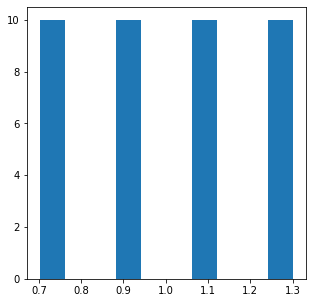

In [60]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(1,1,1)
ax.hist(simulated_suspicion_values[i])

In [61]:
estimated_alpha = [np.round(x[0], 1) for x in best_param_sv]
estimated_alpha_rating = [np.round(x[0], 1) for x in best_param_sv_rating]
generated_alpha = [np.round(x[0], 1) for x in params]

estimated_s0 = [x[1] for x in best_param_sv]
estimated_s0_rating = [x[1] for x in best_param_sv_rating]
generated_s0 = [x[1] for x in params]

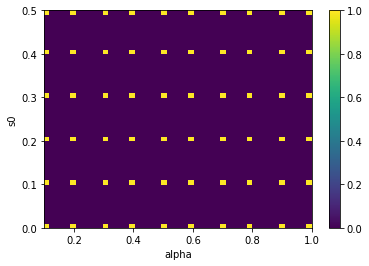

In [62]:
# 2D histogram of alpha and s0 parameter estimates
plt.hist2d(estimated_alpha, estimated_s0, bins=(50, 50))#, cmap=plt.cm.Greys)
plt.colorbar()
plt.xlabel("alpha")
plt.ylabel("s0")
plt.show()

In [63]:
tmp = pd.DataFrame({'alpha': estimated_alpha, 's0': estimated_s0, 'SSE': best_param_sv_SSE})
tmp.shape

(60, 3)

In [64]:
tmp.head()

,alpha,s0,SSE
0,0.1,0.0,0.002036
1,0.1,0.1,0.001330
2,0.1,0.2,0.000092
3,0.1,0.3,0.001750
4,0.1,0.4,0.000601


<AxesSubplot:ylabel='Density'>

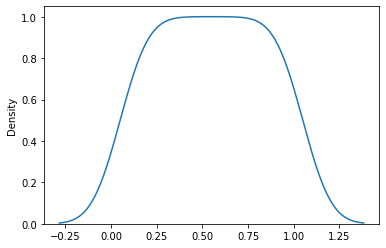

In [65]:
# sanity check: are estimated values of players in expected distribution?
sns.kdeplot(x=estimated_alpha)

<AxesSubplot:ylabel='Density'>

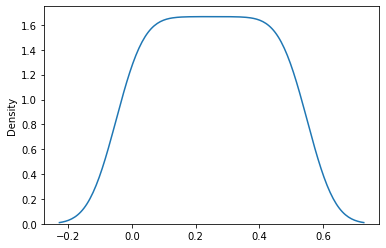

In [66]:
# sanity check: are estimated values of players in expected distribution?
sns.kdeplot(x=estimated_s0)

In [67]:
tmp = pd.pivot_table(data=tmp,
                      index='alpha',
                      values='SSE',
                      columns='s0',
                      dropna=False)

Text(0.5, 1.0, 'SSresiduals from param estimates on simulated unsigned suspicion values')

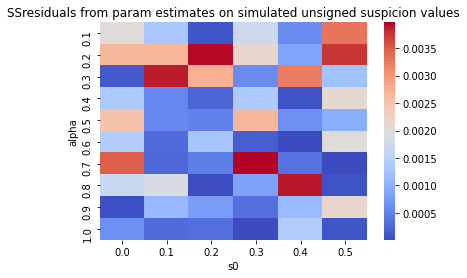

In [68]:
p = sns.heatmap(data=tmp, cmap="coolwarm", square=False)
p.set_title("SSresiduals from param estimates on simulated unsigned suspicion values")

In [69]:
tmp = pd.DataFrame({'alpha': estimated_alpha_rating, 's0': estimated_s0_rating, 'SSE': best_param_sv_rating_SSE})
tmp.shape

(60, 3)

In [70]:
tmp = pd.pivot_table(data=tmp,
                      index='alpha',
                      values='SSE',
                      columns='s0',
                      dropna=False)

Text(0.5, 1.0, 'SSresiduals from param estimates on simulated ratings')

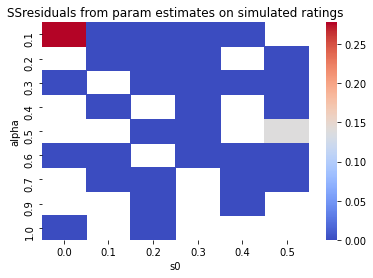

In [71]:
p = sns.heatmap(data=tmp, cmap="coolwarm", square=False)
p.set_title("SSresiduals from param estimates on simulated ratings")

<AxesSubplot:>

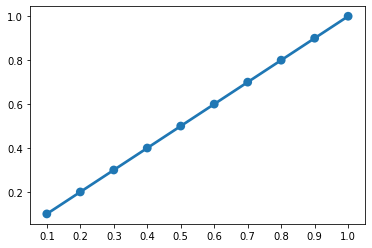

In [72]:
sns.pointplot(x=generated_alpha, y=estimated_alpha)

<AxesSubplot:>

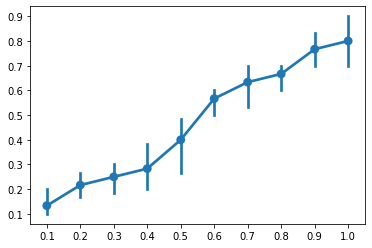

In [73]:
sns.pointplot(x=generated_alpha, y=estimated_alpha_rating)

<AxesSubplot:>

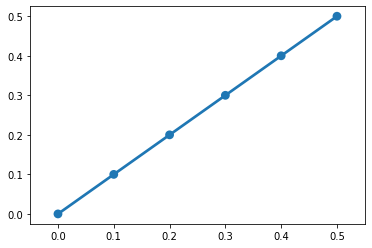

In [74]:
sns.pointplot(x=generated_s0, y=estimated_s0)

<AxesSubplot:>

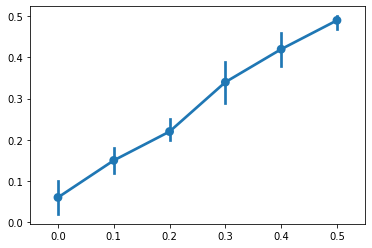

In [75]:
sns.pointplot(x=generated_s0, y=estimated_s0_rating)